In [1]:
"""
 Basic imgae load, plot, resize, etc..
 Sungjoon Choi (sungjoon.choi@cpslab.snu.ac.kr)
"""
# Import packs
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import pandas
import skimage.io
import skimage.transform
import tensorflow as tf

%matplotlib inline  

print ("Package loaded")

Package loaded


In [2]:
# Print Current Folder 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Current folder is /home/enginius/notebooks


<class 'numpy.ndarray'> (1026, 1368, 3)


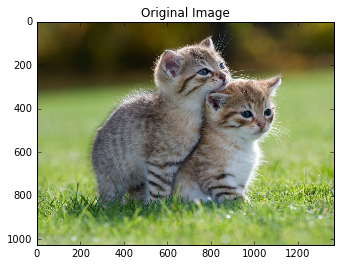

In [9]:
# Plot image ! 
cat = imread(cwd + "/images/cat.jpg")
print (type(cat), cat.shape)
plt.figure(0)
plt.imshow(cat)
plt.title("Original Image")
plt.draw()

size of catsmall is (100, 100, 3)
type of catsmall is <class 'numpy.ndarray'>


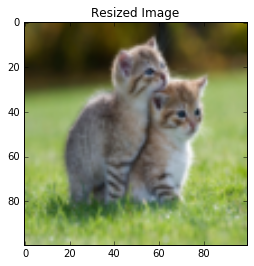

In [4]:
# Resize
catsmall = imresize(cat, [100, 100, 3])
print ("size of catsmall is %s" % (catsmall.shape,))
print ("type of catsmall is", type(catsmall))

plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

size of catsmallgray is (100, 100)
type of catsmallgray is <class 'numpy.ndarray'>


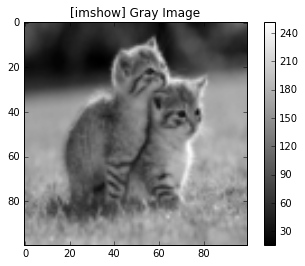

In [5]:
# Grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
catsmallgray = rgb2gray(catsmall)
print ("size of catsmallgray is %s" % (catsmallgray.shape,))
print ("type of catsmallgray is", type(catsmallgray))

plt.figure(2)
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

In [6]:
# Convert to Vector
catrowvec = np.reshape(catsmallgray, (1, -1));
print ("size of catrowvec is %s" % (catrowvec.shape,))
print ("type of catrowvec is", type(catrowvec))

# Convert to Matrix
catmatrix = np.reshape(catrowvec, (100, 100));
print ("size of catmatrix is %s" % (catmatrix.shape,))
print ("type of catmatrix is", type(catmatrix))

size of catrowvec is (1, 10000)
type of catrowvec is <class 'numpy.ndarray'>
size of catmatrix is (100, 100)
type of catmatrix is <class 'numpy.ndarray'>


In [7]:
# Load from Folder
cwd  = os.getcwd()
path = cwd + "/images"
valid_exts = [".jpg",".gif",".png",".tga"]

print ("Images in %s are: \n %s" % (path, os.listdir(path)))

# Append Images and their Names to Lists
imgs = []
names = []
for f in os.listdir(path):
    # For all files 
    ext = os.path.splitext(f)[1]
    # Check types 
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path,f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0]+os.path.splitext(f)[1])
 
# Check
print ("Type of 'imgs': ", type(imgs))
print ("Length of 'imgs': ", len(imgs))
for curr_img, curr_name, i in zip(imgs, names, range(len(imgs))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name is: %s" % (curr_name))
    print ("    Size of 'curr_img': %s" % (curr_img.shape,))
    

Images in /home/enginius/notebooks/images are: 
 ['contruction.jpg', 'rollingstones.jpg', 'cat.jpg', 'celeb.jpg', 'cuba.jpg']
Type of 'imgs':  <class 'list'>
Length of 'imgs':  5
[0] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: contruction.jpg
    Size of 'curr_img': (340, 650, 3)
[1] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: rollingstones.jpg
    Size of 'curr_img': (596, 1024, 3)
[2] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: cat.jpg
    Size of 'curr_img': (1026, 1368, 3)
[3] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: celeb.jpg
    Size of 'curr_img': (340, 650, 3)
[4] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: cuba.jpg
    Size of 'curr_img': (340, 650, 3)


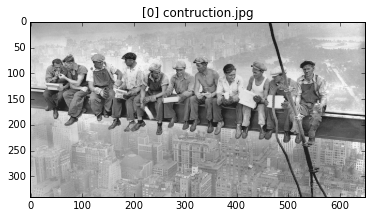

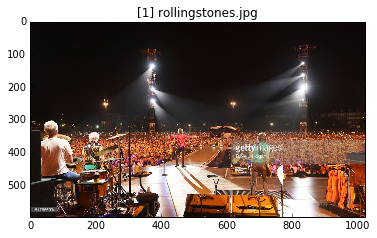

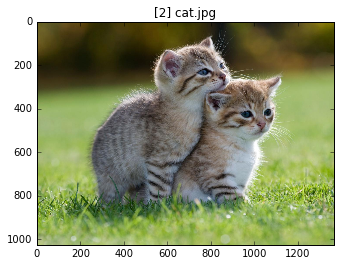

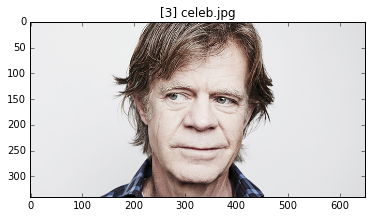

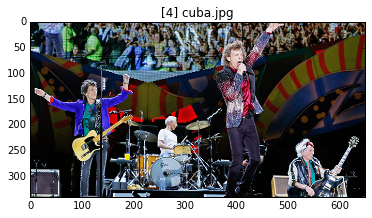

In [8]:
# Plot Images in 'imgs' list
for curr_img, curr_name, i in zip(imgs, names, range(len(imgs))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "] "+ curr_name)
    plt.draw()